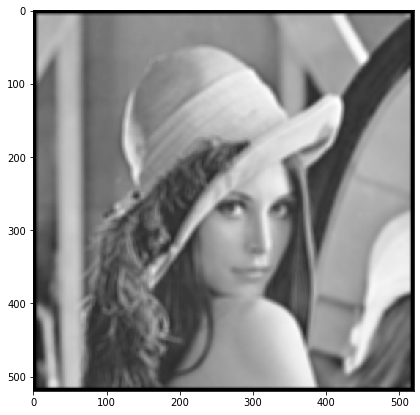

In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

def boxFilter(img, n):
    
    if n%2 == 0:
        n += 1
        
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            sum = 0
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    sum = sum + a
            b = float(sum / (n * n))
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')

img_path = 'lena.png'
img = io.imread(img_path)
img = rgb2gray(img)    
boxFilter(img, 8)

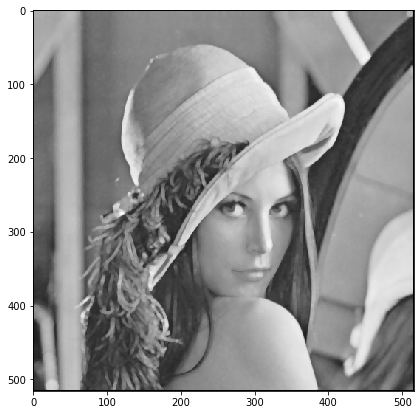

In [39]:
def medianFilter(img, n):
    
    if n%2 == 0:
        n += 1
    
    img = np.pad(img, pad_width = int(n/2), mode='constant', constant_values = 0)
    img_out = img.copy()
    
    height = img.shape[0]
    width = img.shape[1]
    index = int((((n*n) + 1)/2) - 1)

    for i in np.arange(int(n/2), height-int(n/2)):
        for j in np.arange(int(n/2), width-int(n/2)):        
            neighbours = []
            for k in np.arange(-(int(n/2)), int(n/2)):
                for l in np.arange(-(int(n/2)), int(n/2)):
                    a = img.item(i+k, j+l)
                    neighbours.append(a)
            neighbours.sort()
            median = neighbours[index]
            b = median
            img_out.itemset((i,j), b)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(img_out, cmap='gray')
  
medianFilter(img, 5)

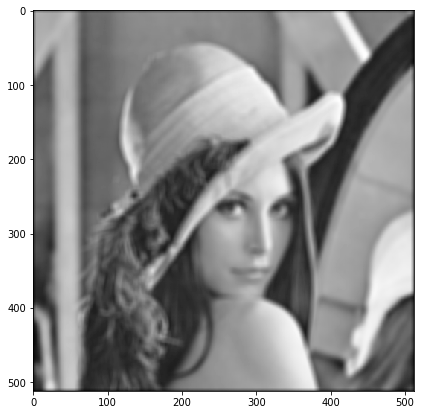

In [21]:
def convolution(image, gfilter):
    
    imageRow = image.shape[0]
    imageColumn = image.shape[1]
    gfilterRow = gfilter.shape[0]
    gfilterColumn = gfilter.shape[1]
    
    imageOut = np.zeros(image.shape)
    
    pad_height = int((gfilterRow - 1) / 2)
    pad_width = int((gfilterColumn - 1) / 2)
 
    padded_image = np.zeros((imageRow + (2 * pad_height), imageColumn + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    
    for row in range(imageRow):
        for col in range(imageColumn):
            imageOut[row, col] = np.sum(gfilter * padded_image[row:row + gfilterRow, col:col + gfilterColumn])
    
    return imageOut

def gaussFunction(x, u, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - u) / sd, 2) / 2)

def createGaussianFilter(n, sigma):
    if n%2 == 0:
        n += 1
    
    filter1D = np.linspace(-(int(n/2)), int(n/2), n)
    for i in range(n):
        filter1D[i] = gaussFunction(filter1D[i], 0, sigma)
    filter2D = np.outer(filter1D.T, filter1D.T)
    filter2D*= 1.0 / filter2D.max()
    
    return filter2D



def gaussianFilter(image, n, sigma):
    
    gaussianFilter = createGaussianFilter(n, sigma)
    filteredImage = convolution(image, gaussianFilter)
    
    fig1 = plt.figure(figsize = (7,7))
    plt.imshow(filteredImage, cmap='gray')

gaussianFilter(img, 8, 10)

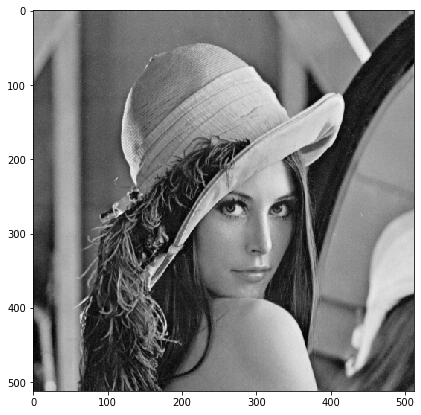

In [30]:
sigma = 0.9
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

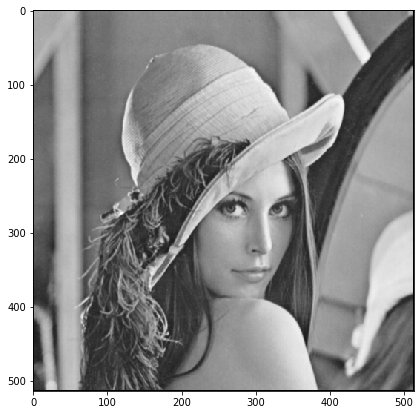

In [31]:
boxFilter(imgNoise, 3)

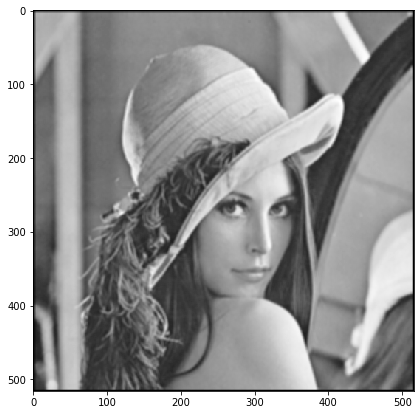

In [32]:
boxFilter(imgNoise, 5)

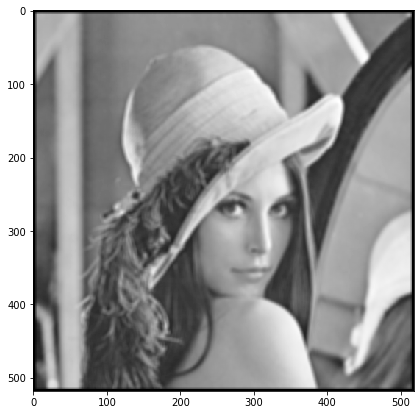

In [33]:
boxFilter(imgNoise, 7)

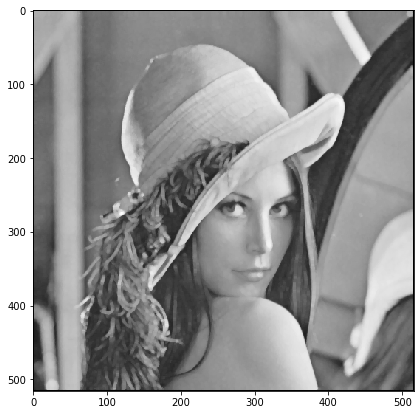

In [40]:
medianFilter(imgNoise, 5)

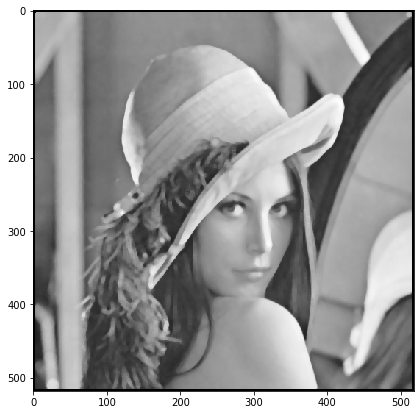

In [41]:
medianFilter(imgNoise, 7)

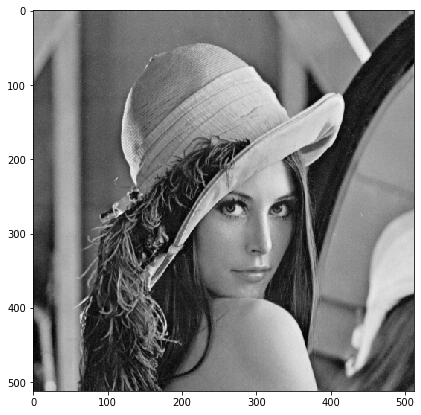

In [42]:
gaussianFilter(imgNoise, 5, 0.1)

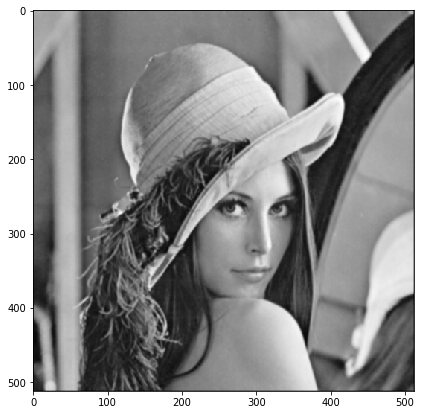

In [43]:
gaussianFilter(imgNoise, 5, 0.9)

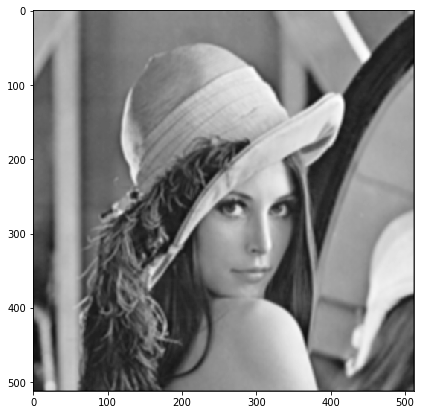

In [44]:
gaussianFilter(imgNoise, 5, 2.5)

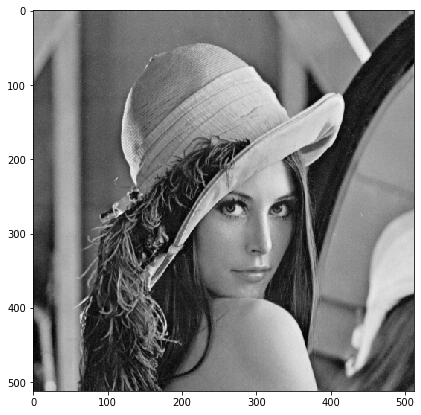

In [45]:
gaussianFilter(imgNoise, 7, 0.1)

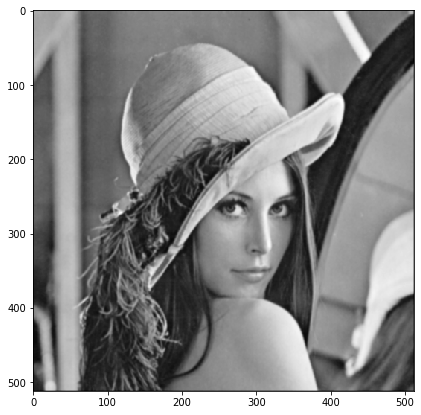

In [46]:
gaussianFilter(imgNoise, 7, 0.9)

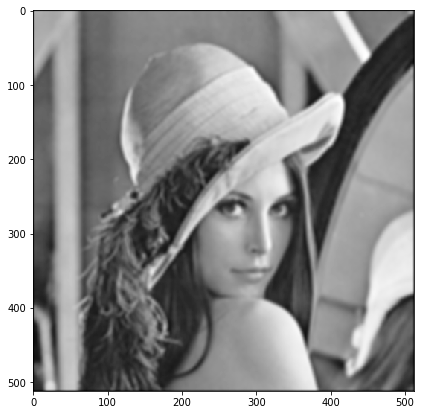

In [47]:
gaussianFilter(imgNoise, 7, 2.5)

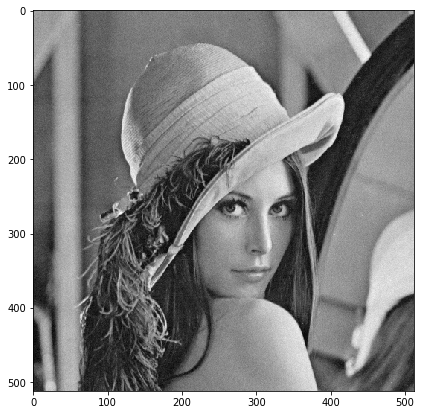

In [50]:
sigma = 4.5
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

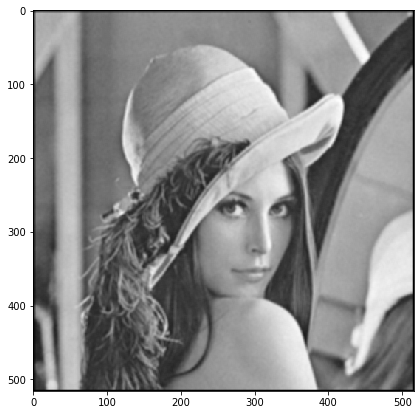

In [51]:
boxFilter(imgNoise, 5)

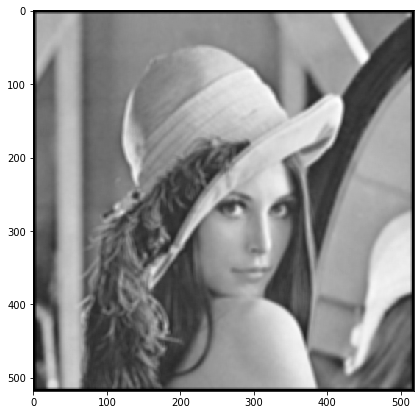

In [52]:
boxFilter(imgNoise, 7)

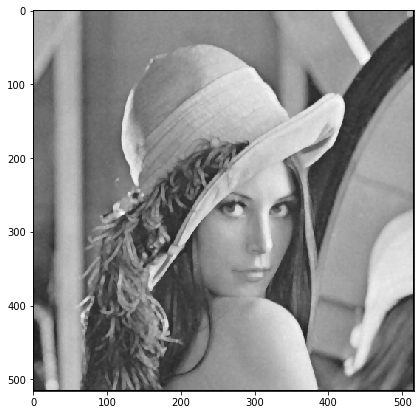

In [53]:
medianFilter(imgNoise, 5)

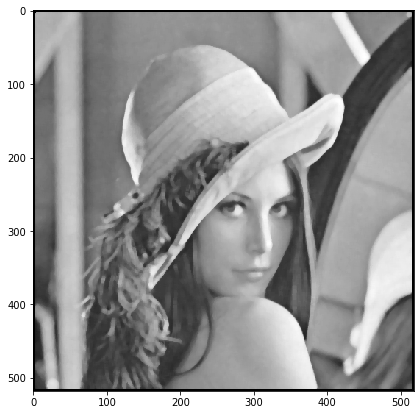

In [54]:
medianFilter(imgNoise, 7)

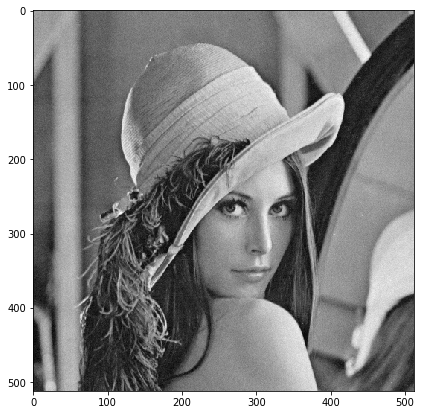

In [55]:
gaussianFilter(imgNoise, 5, 0.1)

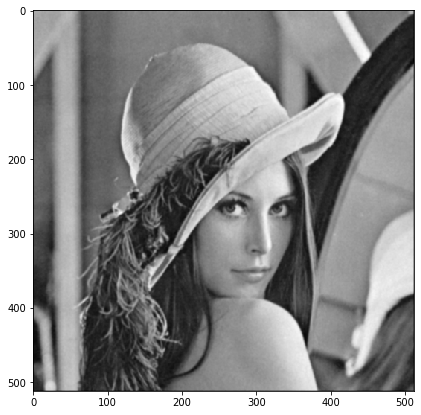

In [56]:
gaussianFilter(imgNoise, 5, 0.9)

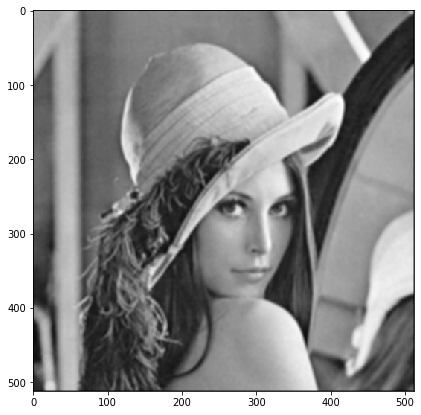

In [57]:
gaussianFilter(imgNoise, 5, 2.5)

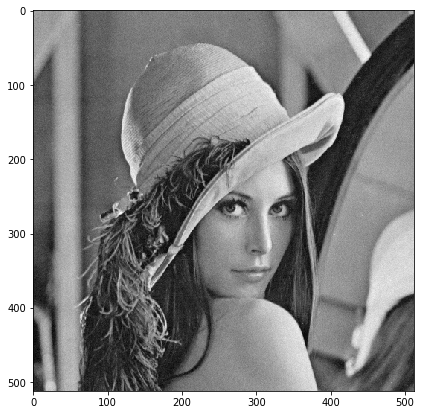

In [58]:
gaussianFilter(imgNoise, 7, 0.1)

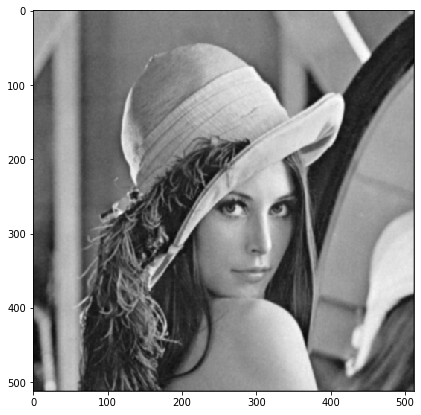

In [59]:
gaussianFilter(imgNoise, 7, 0.9)

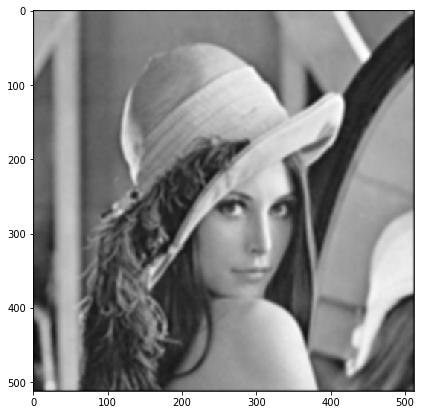

In [60]:
gaussianFilter(imgNoise, 7, 2.5)

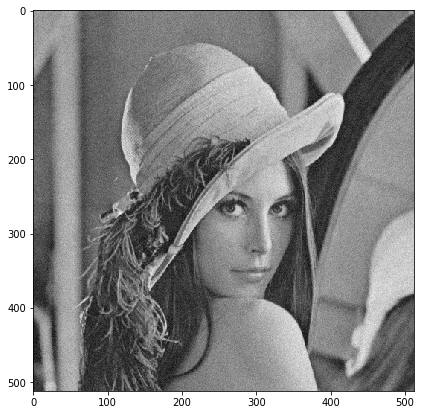

In [61]:
sigma = 9.0
imgNoise = img + sigma*np.random.randn(*img.shape)
fig1 = plt.figure(figsize = (7,7))
plt.imshow(imgNoise, cmap='gray')

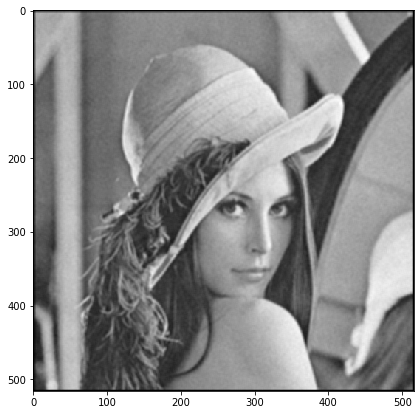

In [62]:
boxFilter(imgNoise, 5)

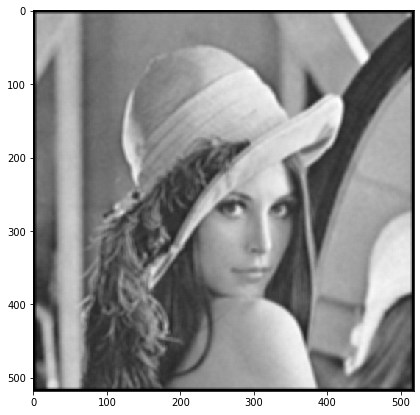

In [63]:
boxFilter(imgNoise, 7)

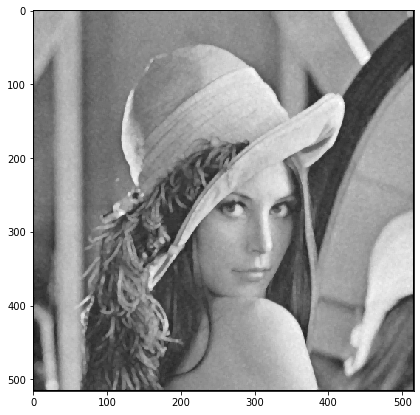

In [64]:
medianFilter(imgNoise, 5)

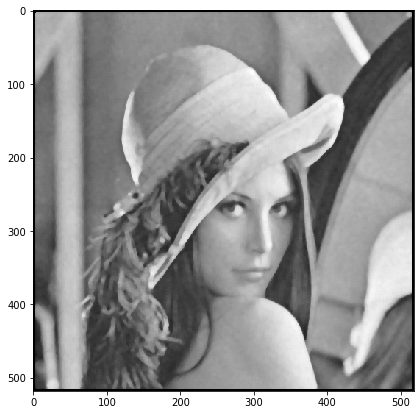

In [65]:
medianFilter(imgNoise, 7)

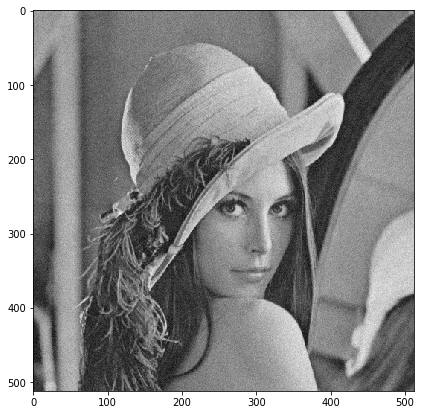

In [66]:
gaussianFilter(imgNoise, 5, 0.1)

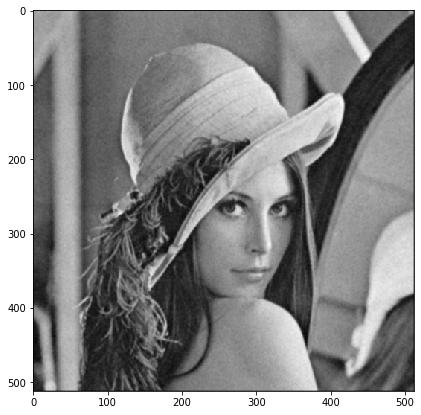

In [67]:
gaussianFilter(imgNoise, 5, 0.9)

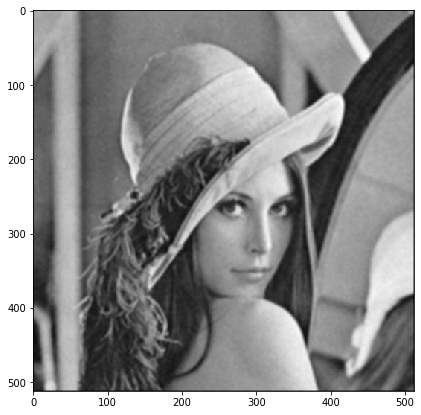

In [68]:
gaussianFilter(imgNoise, 5, 2.5)

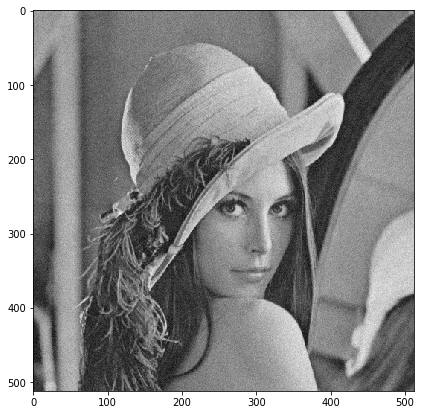

In [69]:
gaussianFilter(imgNoise, 7, 0.1)

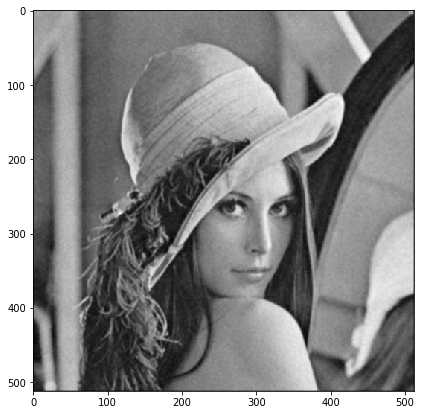

In [70]:
gaussianFilter(imgNoise, 7, 0.9)

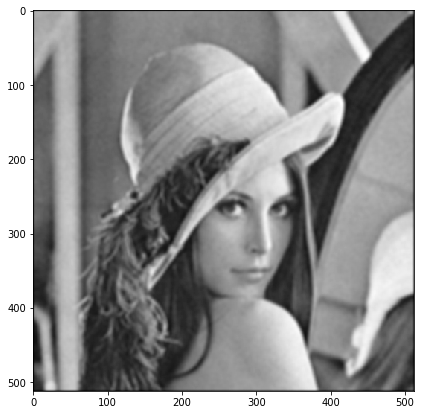

In [71]:
gaussianFilter(imgNoise, 7, 2.5)